## 디더링(Dithering)과 직류 성분 제거(DC Offset Removal)

### 1. 디더링(Dithering)  
디더링은 신호를 디지털화할 때 양자화 오차(Quantization Error)를 줄이기 위해 **무작위적인 노이즈를 추가하는 기법**이다.  
이는 신호의 연속성을 유지하고 왜곡을 줄이는 데 사용된다.

---

### 🔹 디더링의 수학적 표현  
디지털 변환 과정에서 신호 $x(t)$를 **$b$비트 양자화(Quantization)한 신호**를 $\hat{x}(t)$라 할 때, 양자화 과정은 다음과 같이 나타낼 수 있다.

$$
\hat{x}(t) = Q(x(t))
$$

여기서 $Q(x)$는 양자화 연산자로, 특정 레벨에서 신호를 근사한다.  
이때, 양자화 오차(Quantization Error) $e(t)$는 다음과 같이 정의된다.

$$
e(t) = x(t) - \hat{x}(t)
$$

디더링에서는 이 $e(t)$를 무작위적으로 분포된 노이즈 $\eta(t)$로 조정하여 신호의 왜곡을 줄인다.

$$
\hat{x}_{d}(t) = Q(x(t) + \eta(t))
$$

$\eta(t)$는 일반적으로 균일 분포(Uniform Distribution) 또는 삼각 분포(Triangular Distribution)를 따른다.

---

### 🔹 디더링의 효과  
- 작은 신호가 양자화 과정에서 사라지는 것을 방지할 수 있다.
- 주관적으로 신호의 품질이 개선된다.
- 특정 주파수 대역에서 양자화 노이즈가 집중되는 것을 방지한다.

---

### 2. 직류 성분 제거(DC Offset Removal)  
디지털 신호 처리에서 직류 성분(DC Offset)이란 신호의 평균값이 0이 아닌 경우를 의미한다.  
이러한 DC 성분은 음향 처리나 이미지 처리에서 불필요한 왜곡을 초래할 수 있다.

---

### 🔹 DC 성분의 수학적 정의  
연속 신호 $x(t)$의 평균값(DC 성분)은 다음과 같이 정의된다.

$$
x_{DC} = \frac{1}{T} \int_{0}^{T} x(t) dt
$$

디지털 신호에서는 평균값을 다음과 같이 구한다.

$$
x_{DC} = \frac{1}{N} \sum_{n=0}^{N-1} x[n]
$$

여기서 $N$은 샘플 개수이다.

DC 성분을 제거하기 위해 신호에서 평균값을 빼주면 된다.

$$
x_{new}[n] = x[n] - x_{DC}
$$

이 과정을 거치면 신호의 중심이 0을 기준으로 정렬되어 **왜곡 없이 원래 신호의 유용한 성분만 남게 된다**.

---

### 🔹 DC 성분 제거의 효과  
- 음향 신호에서 불필요한 저주파 성분을 제거하여 깨끗한 음질을 얻을 수 있다.
- 이미지 처리에서는 밝기 차이를 제거하여 대비(contrast)를 더 명확하게 만들 수 있다.
- 주파수 분석에서 저주파 대역에 집중되는 불필요한 성분을 줄일 수 있다.


## 고역 강조(High-Pass Filtering)

### 1. 고역 강조란?  
고역 강조(High-Pass Filtering)는 신호에서 저주파 성분을 제거하고, 상대적으로 고주파 성분을 강조하는 기법이다.  
주로 음향 처리, 신호 분석, 이미지 처리에서 사용되며, 특정 주파수 이상의 성분만을 통과시키고 나머지 성분을 차단하는 필터를 사용한다.


### 2. 고역 강조의 수학적 정의  
고역 강조는 **고역 필터**(High-Pass Filter)를 적용하는 것으로, 수학적으로는 필터 함수와 신호의 컨볼루션(convolution)을 이용하여 구현된다.

**고역 필터**는 다음과 같은 전달 함수($H(f)$)를 가질 수 있다:

$$
H(f) = \frac{f}{f + f_c}
$$

여기서:
- $f$는 주파수,
- $f_c$는 차단 주파수(cutoff frequency)로, 이보다 낮은 주파수 성분은 차단되고, 이보다 높은 주파수 성분은 통과된다.

따라서, 고역 필터를 통과한 신호는 저주파 성분이 제거되어 **고주파 성분이 강조된 결과**를 얻을 수 있다.


### 3. 고역 강조 필터링의 직관적 해석  
고역 필터는 신호에서 **저주파 성분**을 제거하고 **고주파 성분**만을 강조한다.  

- **저주파 성분**은 신호의 장기적인 트렌드나 느리게 변화하는 부분을 나타낸다. 예를 들어, 음성 신호에서 말하는 사람의 목소리의 기본적인 톤을 형성하는 저주파 성분.
- **고주파 성분**은 신호의 빠르게 변화하는 부분을 나타낸다. 예를 들어, 음성 신호에서 발음의 세부적인 차이나 악기 소리에서의 세밀한 변화를 나타낸다.

고역 강조는 이런 빠르게 변화하는 신호의 세부 사항을 더 잘 부각시키기 위해 사용된다. 예를 들어, **배경 소음 제거**나 **세부 음향 분석**에서 유용하다.


### 4. 고역 강조의 활용 예시  
- **음성 신호 처리**: 고역 필터를 사용하면 발음의 세부적인 차이를 강조할 수 있다. 이는 음성 인식이나 오디오 편집에서 중요한 역할을 한다.
- **이미지 처리**: 고역 강조 필터를 사용하여 이미지에서 경계선이나 세밀한 텍스처를 강조할 수 있다.
- **통신 시스템**: 고역 필터를 사용하여 신호의 빠르게 변화하는 정보나 중요한 데이터를 강조할 수 있다.


### 5. 고역 강조 필터의 주의점  
- 필터링 과정에서 신호의 일부 정보가 손실될 수 있다. 특히 저주파 성분이 중요한 경우, 그 성분이 사라져 버릴 수 있다.
- 필터의 차단 주파수($f_c$)를 잘 선택하는 것이 중요하다. 너무 높은 주파수를 차단하면 필요한 고주파 성분이 손실될 수 있다.


## 고역 강조 (Pre-emphasis)

### 1. 고역 강조란?  
고역 강조(Pre-emphasis)는 음성 신호 처리에서 사용되는 기법으로, 신호의 고주파 성분을 강조하여 음성 신호의 특성을 보다 명확히 드러내는 방법이다. 주로 음성 신호가 녹음되거나 전송될 때 고주파 성분이 손실되는 경우를 보정하기 위해 사용된다.

---

### 2. 고역 강조의 수학적 표현  
고역 강조는 신호를 처리하는 간단한 차분 방정식으로 정의할 수 있다. 수학적으로 고역 강조는 다음과 같은 식으로 표현된다:

$$
\text{pre\_emphasis}(x(n)) = x(n) - a \cdot x(n-1)
$$

여기서:
- $x(n)$은 현재 샘플,
- $x(n-1)$은 이전 샘플,
- $a$는 강조 계수(pre-emphasis coefficient)로, 일반적으로 0.95 또는 0.97이 사용된다.

### 3. 직관적인 해석  
고역 강조는 현재 샘플 $x(n)$에서 이전 샘플 $x(n-1)$을 빼는 방식으로 동작한다. 이는 신호의 고주파 성분을 더 강조하고, 저주파 성분을 상대적으로 약화시키는 효과를 가진다.   
식에서 $a$가 1에 가까운 값일수록 고역 성분이 더욱 강조되며, $a$가 0에 가까운 값일수록 강조 효과는 미미하다.  
따라서, 이 과정은 신호의 고주파 성분을 더욱 뚜렷하게 하고, 주로 음성의 세밀한 특징을 강조하는 데 사용된다.

### 4. 고역 강조의 효과  
- **음성 신호**: 고역 강조는 음성 신호에서 발음의 명료성이나 자음 부분의 인식 향상에 도움을 줄 수 있다.
- **오디오 신호**: 녹음이나 전송 과정에서 고주파 손실이 발생하는 경우, 고역 강조를 통해 그 손실을 보정할 수 있다.

---  


## 고역 강조 적용 예시

### 1. 고역 강조 공식
고역 강조는 다음의 공식을 사용하여 신호에 적용됩니다:

$$
\text{pre\_emphasis}(x(n)) = x(n) - \alpha \cdot x(n-1)
$$

여기서:
- $x(n)$은 현재 샘플,
- $x(n-1)$은 이전 샘플,
- $\alpha$는 강조 계수 (예: $\alpha = 0.97$).

### 2. 예시 데이터

가정:
- 현재 샘플 $x(n) = 0.5$
- 이전 샘플 $x(n-1) = 0.3$
- 강조 계수 $\alpha = 0.97$

### 3. 고역 강조 계산
위의 공식을 사용하여 $x(n)$에 대해 고역 강조를 계산하면 다음과 같습니다:

$$
\text{pre\_emphasis}(0.5) = 0.5 - 0.97 \cdot 0.3 = 0.5 - 0.291 = 0.209
$$

따라서, 고역 강조된 값은 **0.209**입니다.

### 4. 시간에 따른 예시

가장 간단한 예를 위해 5개의 샘플을 이용해 고역 강조를 적용해 보겠습니다. 
- 샘플 값: $[0.5, 0.3, 0.4, 0.7, 0.6]$
- 강조 계수: $\alpha = 0.97$

#### 계산:

- 첫 번째 샘플($x(1) = 0.5$)은 이전 샘플이 없으므로 그대로 둡니다.
  $$ \text{pre\_emphasis}(x(1)) = 0.5 $$

- 두 번째 샘플($x(2) = 0.3$):
  $$ \text{pre\_emphasis}(0.3) = 0.3 - 0.97 \cdot 0.5 = 0.3 - 0.485 = -0.185 $$

- 세 번째 샘플($x(3) = 0.4$):
  $$ \text{pre\_emphasis}(0.4) = 0.4 - 0.97 \cdot 0.3 = 0.4 - 0.291 = 0.109 $$

- 네 번째 샘플($x(4) = 0.7$):
  $$ \text{pre\_emphasis}(0.7) = 0.7 - 0.97 \cdot 0.4 = 0.7 - 0.388 = 0.312 $$

- 다섯 번째 샘플($x(5) = 0.6$):
  $$ \text{pre\_emphasis}(0.6) = 0.6 - 0.97 \cdot 0.7 = 0.6 - 0.679 = -0.079 $$

### 5. 고역 강조 결과
따라서 고역 강조가 적용된 샘플 값은 다음과 같습니다:
$$ [0.5, -0.185, 0.109, 0.312, -0.079] $$

### 6. 해석
- 각 샘플에서 고역 강조는 **이전 샘플의 값을 빼는 방식**으로 이루어졌습니다.
- 이로 인해 **저주파 성분은 감소하고 고주파 성분은 강조**됩니다.
- 첫 번째 샘플은 이전 값이 없어서 변하지 않았고, 나머지 샘플들은 이전 값에 따라 변화하게 됩니다.

--- 

위 예시처럼, 고역 강조는 샘플 간 차이를 강조하여 신호의 고주파 성분을 뚜렷하게 만들어 주는 기법입니다.


## 고역 강조 필터의 로그 진폭 스펙트럼

### 1. 고역 강조 필터의 수학적 표현

고역 강조 필터는 시간 영역에서 다음과 같은 식으로 나타낼 수 있습니다:

$$
h(n) = \delta(n) - \alpha \cdot \delta(n-1)
$$

여기서:
- $h(n)$은 고역 강조 필터의 시간 영역 응답,
- $\delta(n)$은 디랙 델타 함수,
- $\alpha$는 강조 계수입니다.

### 2. 이산 푸리에 변환 (DTFT)

고역 강조 필터의 주파수 응답 $H(\omega)$는 이산 푸리에 변환(DTFT)을 통해 구할 수 있습니다. DTFT는 다음과 같습니다:

$$
H(\omega) = \sum_{n=-\infty}^{\infty} h(n) e^{-j\omega n}
$$

고역 강조 필터의 경우, 위 식에 필터의 정의를 대입하면:

$$
H(\omega) = \sum_{n=-\infty}^{\infty} \left( \delta(n) - \alpha \cdot \delta(n-1) \right) e^{-j\omega n}
$$

각각의 델타 함수에 대해 계산하면:

$$
H(\omega) = e^{0} - \alpha \cdot e^{-j\omega}
$$

즉, 고역 강조 필터의 주파수 응답은:

$$
H(\omega) = 1 - \alpha e^{-j\omega}
$$

### 3. 로그 진폭 스펙트럼

로그 진폭 스펙트럼은 필터의 주파수 응답의 진폭에 대해 로그를 취한 값입니다. 먼저, $H(\omega)$의 진폭을 구해야 합니다:

$$
|H(\omega)| = \left| 1 - \alpha e^{-j\omega} \right|
$$

이를 풀면:

$$
|H(\omega)| = \sqrt{(1 - \alpha \cos(\omega))^2 + (\alpha \sin(\omega))^2}
$$

이를 간단히 하면:

$$
|H(\omega)| = \sqrt{1 - 2\alpha \cos(\omega) + \alpha^2}
$$

이제, 로그 진폭 스펙트럼을 계산하려면 이 진폭의 자연 로그를 취합니다:

$$
\text{Log Magnitude Spectrum} = \log |H(\omega)| = \log \left( \sqrt{1 - 2\alpha \cos(\omega) + \alpha^2} \right)
$$

로그를 취하면:

$$
\text{Log Magnitude Spectrum} = \frac{1}{2} \log \left( 1 - 2\alpha \cos(\omega) + \alpha^2 \right)
$$

### 4. 최종 식

따라서, 고역 강조 필터의 로그 진폭 스펙트럼은 다음과 같습니다:

$$
\text{Log Magnitude Spectrum} = \frac{1}{2} \log \left( 1 - 2\alpha \cos(\omega) + \alpha^2 \right)
$$


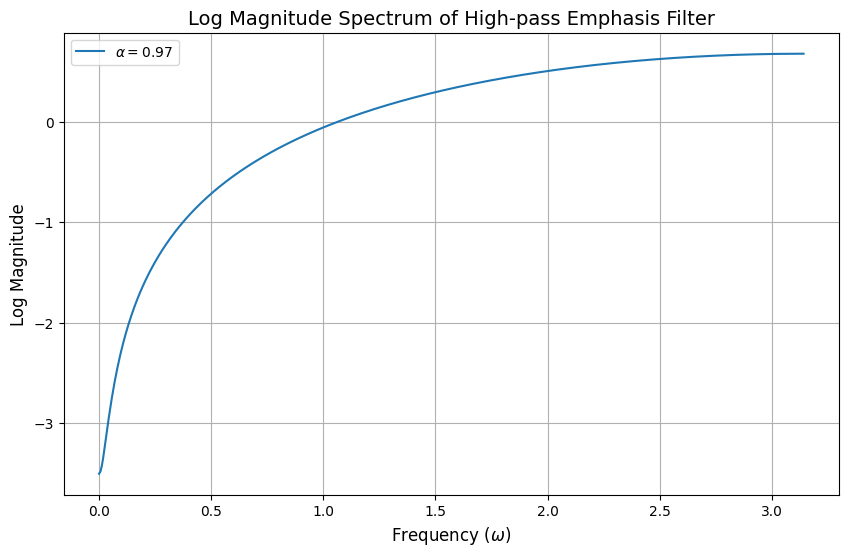

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 파라미터 설정
alpha = 0.97  # 강조 계수
omega = np.linspace(0, np.pi, 500)  # 주파수 범위 (0 ~ pi)

# 고역 강조 필터의 주파수 응답 계산
H_omega = 1 - alpha * np.exp(-1j * omega)

# 진폭 스펙트럼 계산
magnitude_spectrum = np.abs(H_omega)

# 로그 진폭 스펙트럼 계산
log_magnitude_spectrum = 0.5 * np.log(magnitude_spectrum**2)

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 로그 진폭 스펙트럼 그래프
plt.plot(omega, log_magnitude_spectrum, label=r'$\alpha=0.97$')

# 그래프 제목과 레이블
plt.title('Log Magnitude Spectrum of High-pass Emphasis Filter', fontsize=14)
plt.xlabel(r'Frequency ($\omega$)', fontsize=12)
plt.ylabel('Log Magnitude', fontsize=12)

# 범례 추가
plt.legend()

# 그리드 추가
plt.grid(True)

# 그래프 출력
plt.show()


# 3. 결과 설명
# $\alpha$ 값이 0.97일 때, 주파수에 따른 로그 진폭 스펙트럼을 계산하여 그래프로 나타냈습니다.
# 주파수 응답: 고역 강조 필터의 주파수 응답은 1에서 $\alpha$ 값에 비례한 복소 지수 항을 뺀 형태입니다.
# 로그 진폭 스펙트럼: 로그 스케일로 주파수 응답의 진폭을 나타내며, 이 값이 고역 강조 필터의 효과를 시각적으로 보여줍니다.
# 4. 해석
# 고역 강조 필터는 주파수 $\omega = 0$ (DC 성분)에서 감소하며, 고주파($\omega = \pi$)로 갈수록 증가하는 형태를 가집니다.
# 로그 진폭 스펙트럼에서는 고주파 성분이 강조되고, 저주파 성분이 감소하는 패턴이 시각적으로 잘 드러납니다.

## 주파수 범위에서 $k_0 = \frac{K}{2} f_s$의 구체적인 예시와 설명

### 1. 주파수 범위와 인덱스

이 식은 주파수 범위에서 특정 인덱스를 표현하는 방식으로, 필터 뱅크나 이산 푸리에 변환(DFT)에서 자주 사용됩니다. 여기서:

- $k_0$: 특정 주파수 인덱스,
- $f_s$: 샘플링 주파수,
- $K$: 필터 뱅크에서의 필터 개수 (또는 이산 푸리에 변환의 총 점 수).

이 식은 특정 주파수 인덱스 $k_0$가 샘플링 주파수 $f_s$와 필터 개수 $K$에 따라 결정된다는 것을 의미합니다.

### 2. 식의 해석

$$
k_0 = \frac{K}{2} \cdot f_s
$$

- $f_s$는 디지털 신호의 샘플링 주파수를 나타냅니다. 디지털 신호 처리에서, 샘플링 주파수는 아날로그 신호를 디지털화할 때 중요한 역할을 하며, 신호의 정확도를 결정합니다.
- $K$는 필터 뱅크의 필터 수나 이산 푸리에 변환에서 고려되는 샘플 수를 나타냅니다. 이 값은 신호를 얼마나 세밀하게 분석할지 결정합니다.
- $k_0$는 신호의 특정 주파수 성분을 나타내는 인덱스입니다. 이 값은 필터 뱅크나 푸리에 변환에서 특정 주파수 대역을 선택하는 데 사용됩니다.

### 3. 구체적인 예시

가정:
- 샘플링 주파수 $f_s = 1000 \ \text{Hz}$ (즉, 1초 동안 1000개의 샘플을 취합니다),
- 필터 개수 $K = 256$ (256개의 필터 뱅크를 사용),
  
그렇다면 $k_0$는 다음과 같이 계산됩니다:

$$
k_0 = \frac{256}{2} \cdot 1000 = 128 \cdot 1000 = 128000
$$

따라서 $k_0 = 128000$이 됩니다. 이는 샘플링 주파수와 필터 개수에 따라 특정 주파수 성분을 나타내는 인덱스입니다.


## 삼각 필터 및 주파수 구간의 등분할: $F_{low}$, $F_{high}$, $f_l$, $w_l(k)$의 정의와 설명

### 1. 삼각 필터(Triangular Filter) 정의

삼각 필터는 주로 신호 처리에서 주파수 대역을 선택적으로 강조하거나 차단하는 데 사용됩니다. 이는 특정 주파수 구간을 부드럽게 필터링하는 데 유용합니다. 삼각 필터는 이름 그대로 삼각형 모양의 주파수 응답을 갖습니다.

삼각 필터는 주파수 범위에서 **저주파와 고주파 성분을 필터링**하면서, **중간 주파수**에서는 신호를 통과시킵니다. 일반적으로 **두 개의 주파수 값**, 즉 $F_{low}$와 $F_{high}$를 기준으로 주파수 범위를 나누어 삼각형 형태로 필터링합니다.

### 2. 주파수 범위 정의

- $F_{low}$: 필터의 낮은 주파수 경계.
- $F_{high}$: 필터의 높은 주파수 경계.
- $f_l$: 필터가 적용되는 주파수 값.

### 3. 삼각 필터 함수: $w_l(k)$의 정의

삼각 필터의 주파수 응답 함수는 $w_l(k)$로 정의되며, 이는 주파수 인덱스 $k$에 대한 필터 응답을 나타냅니다. $w_l(k)$는 주어진 주파수 범위 내에서 삼각형 형태의 응답을 생성하며, 이를 통해 주파수 대역을 필터링합니다.

#### 삼각 필터의 수학적 표현:

삼각 필터 $w_l(k)$는 일반적으로 다음과 같이 정의됩니다:

$$
w_l(k) = 
\begin{cases}
1 - \left|\frac{k - k_l}{k_h - k_l}\right| & \text{if} \quad k_l \leq k \leq k_h \\
0 & \text{otherwise}
\end{cases}
$$

여기서:
- $k_l$: 필터의 시작 주파수 인덱스 ($F_{low}$와 관련),
- $k_h$: 필터의 끝 주파수 인덱스 ($F_{high}$와 관련),
- $k$: 주파수 인덱스 (필터의 각 주파수에 대한 응답을 계산하는 값).

### 4. 주파수 대역 구간 정의: $F_{low}$, $F_{high}$

- **$F_{low}$**: 이 값은 삼각 필터의 시작 주파수입니다. 필터는 이 주파수 이하의 신호 성분을 제거하거나 약화시킵니다.
- **$F_{high}$**: 이 값은 삼각 필터의 끝 주파수입니다. 필터는 이 주파수 이상의 신호 성분을 제거하거나 약화시킵니다.

### 5. 삼각 필터의 주파수 구간을 등분할한 주파수 $f_l$

주파수 범위를 등분할하는 경우, 구간을 $f_l$로 정의된 주파수 인덱스로 나눕니다. 예를 들어, 주파수 범위 $[F_{low}, F_{high}]$를 여러 개의 구간으로 나눈다면, 각 구간의 주파수 값은 $f_l$로 표현될 수 있습니다.

따라서, $f_l$은 필터에서 적용되는 주파수 값으로, 각 주파수 구간에서 삼각 필터가 어떻게 적용될지를 정의하는 중요한 요소입니다.

### 6. 예시

가정:
- $F_{low} = 100 \, \text{Hz}$,
- $F_{high} = 500 \, \text{Hz}$,
- $k_l = 100$, 
- $k_h = 500$.

위의 값을 삼각 필터에 대입하여 $w_l(k)$를 계산하면, $k$가 $[100, 500]$ 범위 내에 있을 때 삼각형 형태의 응답을 얻을 수 있습니다. 이때 $k_l$과 $k_h$는 주파수 경계를 정의하며, 필터의 효과는 해당 구간 내에서 선형적으로 변하게 됩니다.


### Mel 필터 뱅크

Mel 필터 뱅크는 인간의 청각 시스템에 맞추어 설계된 주파수 필터 뱅크이다. Mel 스케일은 주파수의 비선형적 변환으로, 사람의 귀가 높은 주파수보다 낮은 주파수를 더 민감하게 인식하는 특징을 반영한다. 이 필터 뱅크는 음성 및 오디오 신호에서 주파수 대역별 특성을 추출하는 데 사용된다.

### 1. Mel 스케일
Mel 스케일은 주파수를 사람이 인식하는 방식에 맞게 변환한 것이다. 일반적인 주파수 스케일과 달리, Mel 스케일은 낮은 주파수에서 더 세밀하게, 높은 주파수에서는 더 넓은 간격을 가진다. Mel 스케일은 다음의 수식으로 정의된다:

$$
Mel(f) = 2595 \cdot \log_{10}(1 + \frac{f}{700})
$$

- $f$는 Hz 단위의 주파수
- $Mel(f)$는 Mel 스케일에서의 주파수

이 공식에 따르면, 주파수가 높아질수록 Mel 값은 선형적으로 증가한다.

### 2. Mel 필터 뱅크의 구조
Mel 필터 뱅크는 주파수 영역을 여러 개의 Mel 주파수 대역으로 분할하여, 각 대역에 대해 필터를 적용하는 구조이다. 각 필터는 삼각형 형태로, 특정 주파수 범위에서 신호의 에너지를 추출한다. 필터의 수는 일반적으로 20개에서 40개 정도 사용되며, 주파수 대역에 따라 필터의 폭과 위치가 다르다.

- **Low-Frequency 영역**에서는 필터들이 좁게 배치되어 세밀한 주파수 정보를 얻을 수 있다.
- **High-Frequency 영역**에서는 필터들이 넓게 배치되어 고주파수 성분을 잡아낼 수 있다.

Mel 필터 뱅크는 대개 음성 분석이나 오디오 인식에서 사용되며, 일반적으로 20개의 필터가 표준으로 사용된다.

### 3. Mel 필터 뱅크 적용 과정
Mel 필터 뱅크의 적용 과정은 다음과 같다:

1. **주파수 스펙트럼 추출**: 먼저 시간 영역에서 신호를 FFT(빠른 푸리에 변환)를 통해 주파수 스펙트럼으로 변환한다.
2. **Mel 스케일 변환**: 주파수 스펙트럼을 Mel 스케일에 맞춰 필터를 적용하여 여러 개의 주파수 대역으로 나눈다.
3. **필터링**: Mel 스케일에 맞춰 설계된 여러 개의 삼각형 필터를 통해 주파수 대역을 나눈다. 각 필터는 특정 범위의 주파수 에너지를 추출한다.
4. **로그 변환**: 필터링된 결과에 로그 변환을 적용하여 신호의 강도 차이를 강조한다.

### 4. Mel 필터 뱅크의 역할
Mel 필터 뱅크는 음성 및 오디오 신호에서 주파수 성분을 사람의 청각 특성에 맞게 변환하여 중요 정보를 추출하는 역할을 한다. 특히 음성 인식에서 중요한 특성인 주파수 대역별 에너지를 잘 반영할 수 있다. 또한, 로그 변환을 통해 작은 차이를 강조하고, 사람의 청각에 맞춰 더욱 직관적인 특징을 추출할 수 있다.

### 5. Mel 필터 뱅크 특성치
Mel 필터 뱅크의 출력 값은 일반적으로 **Mel 주파수 켑스트럼 계수(MFCC)**로 변환되어 사용된다. MFCC는 음성 신호에서 중요한 정보를 추출하고, 음성 인식이나 오디오 분석에서 많이 사용된다.

### 요약
Mel 필터 뱅크는 인간의 청각 특성에 맞춰 주파수를 변환하고, 여러 개의 필터를 사용해 주파수 대역별 특성을 추출하는 방법이다. 이는 음성 인식 및 오디오 분석에서 중요한 특징을 잘 반영할 수 있다.


### 로그 Mel 필터 뱅크 특성치와 Mel 주파수에 대한 수식 (수치 예시 포함)

로그 Mel 필터 뱅크는 Mel 주파수 스케일을 사용하여 주파수 성분을 강조하고, 로그 변환을 통해 각 대역의 특성을 추출하는 방법이다. 이 과정은 음성 신호에서 사람의 청각 시스템에 더 적합한 특성치를 추출하는 데 사용된다.

### 1. Mel 주파수 대역의 정의
Mel 주파수는 주파수 축을 인간의 청각적 지각에 맞게 비선형적으로 변환한 주파수 단위다. Mel 주파수는 다음과 같은 수식으로 정의된다:

$$
Mel(f) = 2595 \cdot \log_{10} \left(1 + \frac{f}{700}\right)
$$

여기서:
- $f$는 Hz 단위의 주파수,
- $Mel(f)$는 해당 주파수에 대응하는 Mel 단위의 주파수이다.

### 2. Mel 필터 뱅크의 수식
Mel 필터 뱅크는 주파수 축을 여러 개의 Mel 주파수 대역으로 나누고, 각 대역에 대해 삼각형 형태의 필터를 적용한다. 이 필터들은 주파수 영역에서 신호의 에너지를 강조하기 위해 사용된다.

#### 2.1. $W_l^{mel}(k)$의 정의
Mel 필터의 가중치 함수는 삼각형 필터로 정의되며, 각 구간 $m_l$, $m_l+1$, $m_l+2$에 대해 계산된다.

- $m_l$부터 $m_l+1$ 구간에 대해:
  $$
  W_l^{mel}(k) = \frac{k - m_l}{m_{l+1} - m_l}, \quad \text{if } m_l \leq k \leq m_l+1
  $$

- $m_l+1$부터 $m_l+2$ 구간에 대해:
  $$
  W_l^{mel}(k) = \frac{m_{l+2} - k}{m_l+2 - m_l+1}, \quad \text{if } m_l+1 \leq k \leq m_l+2
  $$

- 그 외의 경우는:
  $$
  W_l^{mel}(k) = 0, \quad \text{if } k \notin [m_l, m_l+2]
  $$

여기서:
- $m_l$은 해당 필터의 시작 주파수,
- $m_l+1$과 $m_l+2$는 해당 필터의 끝 주파수를 나타낸다.

#### 2.2. 예시
Mel 필터 뱅크에서 주파수 $k$에 대한 가중치 함수 $W_l^{mel}(k)$를 구하기 위해 $f_s = 8000 \, \text{Hz}$라는 샘플링 주파수를 가진 오디오 신호를 사용한다고 가정하자. 주파수 축을 Mel 필터로 변환하고, Mel 대역을 3개로 나눈다고 가정하자.

**구체적인 예시**:
- 샘플링 주파수 $f_s = 8000 \, \text{Hz}$
- $m_0 = 0 \, \text{Hz}$, $m_1 = 1500 \, \text{Hz}$, $m_2 = 3000 \, \text{Hz}$

그러면 $W_l^{mel}(k)$는 $m_0$, $m_1$, $m_2$ 대역에 대해 다음과 같이 구할 수 있다.

1. $m_0 = 0$ Hz부터 $m_1 = 1500$ Hz까지:
   $$
   W_0^{mel}(k) = \frac{k - 0}{1500 - 0} = \frac{k}{1500}
   $$

2. $m_1 = 1500$ Hz부터 $m_2 = 3000$ Hz까지:
   $$
   W_1^{mel}(k) = \frac{3000 - k}{3000 - 1500} = \frac{3000 - k}{1500}
   $$

따라서, 각 필터의 가중치 값은 $k$ 값에 대해 선형적으로 계산된다.

### 3. 진폭 스펙트럼 $|y(k)|$의 계산
각 주파수 성분에 대해 진폭 스펙트럼 $|y(k)|$는 Mel 필터 뱅크의 필터에 의해 출력된다. 이 값은 주파수 성분의 에너지를 Mel 주파수 대역에 맞게 강조한 후 구해진다. 진폭 스펙트럼 $|y(k)|$는 다음과 같이 정의된다:

$$
|y(k)| = \sum_{l} W_l^{mel}(k) \cdot |X(k)|
$$

여기서:
- $|X(k)|$는 FFT를 통해 얻은 주파수 성분의 진폭 스펙트럼,
- $W_l^{mel}(k)$는 Mel 필터의 가중치 함수,
- $l$은 필터 뱅크의 필터 인덱스이다.

#### 예시:
- FFT 결과로 얻은 주파수 성분: $|X(k)| = [5, 8, 10, 12, 15]$
- 첫 번째 Mel 필터에 대해 가중치: $W_0^{mel}(k) = [0.33, 0.5, 0.67, 0.83, 1]$

그러면 첫 번째 Mel 필터의 출력은:

$$
|y_0(k)| = 0.33 \cdot 5 + 0.5 \cdot 8 + 0.67 \cdot 10 + 0.83 \cdot 12 + 1 \cdot 15 = 1.65 + 4 + 6.7 + 9.96 + 15 = 37.31
$$

### 4. 로그 변환을 통한 특성치 추출
진폭 스펙트럼을 로그 변환하여 Mel 필터 뱅크 특성치를 얻을 수 있다. 로그 변환을 적용한 값은 다음과 같다:

$$
b_l^{mel} = \log(|y_l(k)| + \epsilon)
$$

여기서:
- $b_l^{mel}$은 $l$번째 Mel 필터 대역에 대한 로그 Mel 특성치,
- $\epsilon$은 작은 값으로 0에 가까운 값을 추가하여 0의 로그를 피한다.

#### 예시:
- $|y_l(k)| = 37.31$
- $\epsilon = 1e-6$

로그 변환된 값은 다음과 같다:

$$
b_l^{mel} = \log(37.31 + 1e-6) \approx 1.572
$$

### 5. 로그 Mel 필터 뱅크 특성치의 역할
로그 Mel 필터 뱅크 특성치는 주로 음성 인식 및 오디오 신호 분석에서 사용된다. 로그 변환을 통해 낮은 에너지 변화가 더 잘 반영되도록 하여 인간의 청각 특성에 맞는 특징을 잘 추출할 수 있다.

### 요약
- **Mel 주파수**는 주파수 축을 인간의 청각 특성에 맞게 변환한 값이다.
- **Mel 필터 뱅크**는 주파수 성분을 Mel 주파수 대역에 맞게 필터링하는 방법이다.
- 각 Mel 필터는 **삼각형 형태**로 정의되며, 주파수 대역에 대한 에너지를 추출한다.
- **로그 변환**을 통해 각 Mel 대역의 특성치를 얻을 수 있다.


### Mel 필터 뱅크의 저주파 영역과 고주파 영역

Mel 필터 뱅크는 주파수 축을 인간의 청각 시스템에 맞게 비선형적으로 나눈 필터로, 일반적으로 저주파 영역과 고주파 영역에서 서로 다른 특성을 가집니다.

1. **저주파 영역**: Mel 필터는 낮은 주파수에서 상대적으로 넓은 대역폭을 갖습니다. 이는 사람의 청각이 저주파에 더 민감하기 때문입니다.
2. **고주파 영역**: 고주파 대역에서는 Mel 필터가 좁은 대역폭을 가지며, 이는 고주파 대역에서 사람의 청각이 덜 민감하기 때문입니다.

### 1. Mel 주파수 스케일의 범위
Mel 주파수는 $f_s = 8000$ Hz와 같은 특정 샘플링 주파수를 가정하고, Mel 주파수의 범위를 구할 수 있습니다. 일반적으로 Mel 필터 뱅크는 0 Hz부터 Nyquist 주파수까지의 주파수 범위에 적용됩니다. Nyquist 주파수는 샘플링 주파수의 절반으로 정의됩니다.

- **저주파 영역**: Mel 스케일에서 낮은 주파수 영역은 0 Hz에서 시작하여 점차적으로 비선형적으로 증가합니다.
- **고주파 영역**: Mel 스케일에서 고주파 영역은 더 빠르게 증가하며, 사람의 청각에 덜 민감한 고주파 영역을 더 압축합니다.


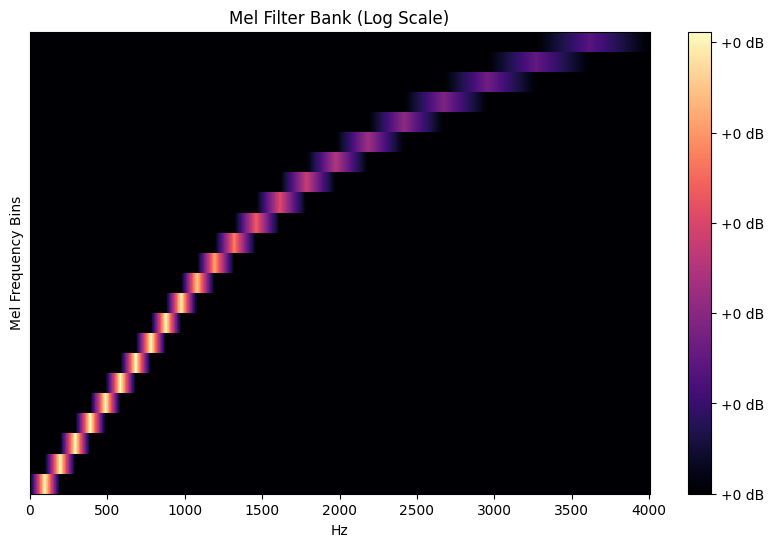

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# 샘플링 주파수
fs = 8000  # 샘플링 주파수 (Hz)
n_fft = 2048  # FFT 크기
hop_length = 512  # hop_length (샘플 간격)
n_mels = 23  # Mel 필터 수

# 음성 신호 생성
y = np.sin(2 * np.pi * 440 * np.linspace(0, 2, fs))  # 440Hz 신호 생성

# Mel 필터 뱅크 생성
mel_filters = librosa.filters.mel(sr=fs, n_fft=n_fft, n_mels=n_mels, fmin=0, fmax=fs/2)

# 필터 뱅크 시각화
plt.figure(figsize=(10, 6))
librosa.display.specshow(mel_filters, x_axis='linear', sr=fs)
plt.title('Mel Filter Bank (Log Scale)')
plt.ylabel('Mel Frequency Bins')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [5]:
# -*- coding: utf-8 -*-

#
# 메르 필터 뱅크 특징을 계산하는 코드입니다.
#

# wav 데이터를 읽기 위한 모듈(wave)을 임포트
import wave

# 수치 연산용 모듈(numpy)을 임포트
import numpy as np

# os, sys 모듈을 임포트
import os
import sys

class FeatureExtractor():
    ''' 특징량(FBANK, MFCC)을 추출하는 클래스
    sample_frequency: 입력 파형의 샘플링 주파수 [Hz]
    frame_length: 프레임 크기 [밀리초]
    frame_shift: 분석 간격(프레임 시프트) [밀리초]
    num_mel_bins: 메르 필터 뱅크의 수(=FBANK 특징의 차원 수)
    num_ceps: MFCC 특징의 차원 수(0차원 포함)
    lifter_coef: 리프터링 처리의 파라미터
    low_frequency: 저주파 대역 제거의 컷오프 주파수 [Hz]
    high_frequency: 고주파 대역 제거의 컷오프 주파수 [Hz]
    dither: 디더링 처리의 파라미터(잡음의 강도)
    '''
    # 클래스가 호출될 때 처음 실행되는 함수
    def __init__(self, 
                 sample_frequency=16000, 
                 frame_length=25, 
                 frame_shift=10, 
                 num_mel_bins=23, 
                 num_ceps=13, 
                 lifter_coef=22, 
                 low_frequency=20, 
                 high_frequency=8000, 
                 dither=1.0):
        # 샘플링 주파수[Hz]
        self.sample_freq = sample_frequency
        # 윈도우 크기를 밀리초에서 샘플 수로 변환
        self.frame_size = int(sample_frequency * frame_length * 0.001)
        # 프레임 시프트를 밀리초에서 샘플 수로 변환
        self.frame_shift = int(sample_frequency * frame_shift * 0.001)
        # 메르 필터 뱅크의 수
        self.num_mel_bins = num_mel_bins
        # MFCC의 차원 수(0차원 포함)
        self.num_ceps = num_ceps
        # 리프터링의 파라미터
        self.lifter_coef = lifter_coef
        # 저주파 대역 제거의 컷오프 주파수[Hz]
        self.low_frequency = low_frequency
        # 고주파 대역 제거의 컷오프 주파수[Hz]
        self.high_frequency = high_frequency
        # 디더링 계수
        self.dither_coef = dither

        # FFT의 포인트 수 = 윈도우 크기 이상의 2의 거듭제곱
        self.fft_size = 1
        while self.fft_size < self.frame_size:
            self.fft_size *= 2

        # 메르 필터 뱅크 생성
        self.mel_filter_bank = self.MakeMelFilterBank()

        # 이산 코사인 변환(DCT)의 기저 행렬 생성
        self.dct_matrix = self.MakeDCTMatrix()

        # 리프터(lifter) 생성
        self.lifter = self.MakeLifter()


    def Herz2Mel(self, herz):
        ''' 주파수를 헤르츠에서 메르로 변환하는 함수
        '''
        return (1127.0 * np.log(1.0 + herz / 700))


    def MakeMelFilterBank(self):
        ''' 메르 필터 뱅크 생성 함수
        '''
        # 메르 축에서의 최대 주파수
        mel_high_freq = self.Herz2Mel(self.high_frequency)
        # 메르 축에서의 최소 주파수
        mel_low_freq = self.Herz2Mel(self.low_frequency)
        # 최소부터 최대 주파수까지,
        # 메르 축 상에서 균등한 간격의 주파수를 얻음
        mel_points = np.linspace(mel_low_freq, 
                                 mel_high_freq, 
                                 self.num_mel_bins+2)

        # 파워 스펙트럼의 차원 수 = FFT 크기/2 + 1
        # ※Kaldi 구현에서는 나이퀴스트 주파수 성분(마지막 +1)을 버리지만,
        # 본 구현에서는 이를 버리지 않고 사용
        dim_spectrum = int(self.fft_size / 2) + 1

        # 메르 필터 뱅크(필터 수 x 스펙트럼 차원 수)
        mel_filter_bank = np.zeros((self.num_mel_bins, dim_spectrum))
        for m in range(self.num_mel_bins):
            # 삼각형 필터의 왼쪽, 중앙, 오른쪽 메르 주파수
            left_mel = mel_points[m]
            center_mel = mel_points[m+1]
            right_mel = mel_points[m+2]
            # 파워 스펙트럼의 각 빈에 대해 가중치를 계산
            for n in range(dim_spectrum):
                # 각 빈에 대응하는 헤르츠 축 주파수 계산
                freq = 1.0 * n * self.sample_freq / 2 / dim_spectrum
                # 메르 주파수로 변환
                mel = self.Herz2Mel(freq)
                # 해당 빈이 삼각형 필터의 범위에 있으면, 가중치를 계산
                if mel > left_mel and mel < right_mel:
                    if mel <= center_mel:
                        weight = (mel - left_mel) / (center_mel - left_mel)
                    else:
                        weight = (right_mel - mel) / (right_mel - center_mel)
                    mel_filter_bank[m][n] = weight
         
        return mel_filter_bank

    
    def ExtractWindow(self, waveform, start_index, num_samples):
        '''
        1프레임의 파형 데이터를 추출하고, 전처리를 수행.
        또한, 로그 파워 값도 계산함.
        '''
        # waveform에서 1프레임의 파형을 추출
        window = waveform[start_index:start_index + self.frame_size].copy()

        # 디더링 처리
        # (-dither_coef~dither_coef 범위의 균등 분포 난수를 더함)
        if self.dither_coef > 0:
            window = window \
                     + np.random.rand(self.frame_size) \
                     * (2 * self.dither_coef) - self.dither_coef

        # 직류 성분 제거
        window = window - np.mean(window)

        # 후속 처리를 수행하기 전에 파워를 계산
        power = np.sum(window ** 2)
        # 로그 계산 시 -inf가 출력되지 않도록 플로어링 처리
        if power < 1E-10:
            power = 1E-10
        # 로그를 계산
        log_power = np.log(power)

        # 프리엠퍼시스(고역 강조) 
        # window[i] = 1.0 * window[i] - 0.97 * window[i-1]
        window = np.convolve(window, np.array([1.0, -0.97]), mode='same')
        # numpy의 합성곱에서는 0번째 요소가 처리되지 않음
        # (window[i-1]이 없으므로) 때문에,
        # window[0-1]을 window[0]으로 대체하여 처리
        window[0] -= 0.97 * window[0]

        # 해밍 윈도우 적용
        # hamming[i] = 0.54 - 0.46 * np.cos(2*np.pi*i / (self.frame_size - 1))
        window *= np.hamming(self.frame_size)

        return window, log_power


    def ComputeFBANK(self, waveform):
        ''' 메르 필터 뱅크 특징(FBANK)을 계산하는 함수
        출력1: fbank_features: 메르 필터 뱅크 특징
        출력2: log_power: 로그 파워 값(MFCC 추출 시 사용)
        '''
        # 파형 데이터의 총 샘플 수
        num_samples = np.size(waveform)
        # 특징량의 총 프레임 수 계산
        num_frames = (num_samples - self.frame_size) // self.frame_shift + 1
        # 메르 필터 뱅크 특징
        fbank_features = np.zeros((num_frames, self.num_mel_bins))
        # 로그 파워(MFCC 특징을 구할 때 사용)
        log_power = np.zeros(num_frames)

        # 1프레임씩 특징량을 계산
        for frame in range(num_frames):
            # 분석 시작 위치는 프레임 번호(0부터 시작) * 프레임 시프트
            start_index = frame * self.frame_shift
            # 1프레임의 파형을 추출하고 전처리를 수행
            # 또한 로그 파워 값을 얻음
            window, log_pow = self.ExtractWindow(waveform, start_index, num_samples)
            
            # 빠른 푸리에 변환(FFT) 수행
            spectrum = np.fft.fft(window, n=self.fft_size)
            # FFT 결과의 오른쪽 절반(음의 주파수 성분)을 제거
            # ※Kaldi 구현에서는 나이퀴스트 주파수 성분(마지막 +1)을 버리지만,
            # 본 구현에서는 이를 버리지 않음
            spectrum = spectrum[:int(self.fft_size / 2) + 1]

            # 파워 스펙트럼 계산
            spectrum = np.abs(spectrum) ** 2

            # 메르 필터 뱅크와 곱셈 후 가중치 합성
            fbank = np.dot(spectrum, self.mel_filter_bank.T)

            # 로그 계산 시 -inf가 출력되지 않도록 플로어링 처리
            fbank[fbank < 0.1] = 0.1

            # 로그를 취한 후 fbank_features에 추가
            fbank_features[frame] = np.log(fbank)

            # 로그 파워 값은 log_power에 추가
            log_power[frame] = log_pow

        return fbank_features, log_power


    def MakeDCTMatrix(self):
        ''' 이산 코사인 변환(DCT) 기저 행렬 생성
        '''
        N = self.num_mel_bins
        # DCT 기저 행렬 (기저 수(=MFCC의 차원 수) x FBANK의 차원 수)
        dct_matrix = np.zeros((self.num_ceps, self.num_mel_bins))
        for k in range(self.num_ceps):
            if k == 0:
                dct_matrix[k] = np.ones(self.num_mel_bins) * 1.0 / np.sqrt(N)
            else:
                dct_matrix[k] = np.sqrt(2 / N) \
                    * np.cos(((2.0 * np.arange(N) + 1) * k * np.pi) / (2 * N))

        return dct_matrix


    def MakeLifter(self):
        ''' 리프터 계산
        '''
        Q = self.lifter_coef
        I = np.arange(self.num_ceps)
        lifter = 1.0 + 0.5 * Q * np.sin(np.pi * I / Q)
        return lifter


    def ComputeMFCC(self, waveform):
        ''' MFCC를 계산하는 함수
        '''
        # FBANK와 로그 파워를 계산
        fbank, log_power = self.ComputeFBANK(waveform)
        
        # DCT 기저 행렬과 내적하여 DCT 수행
        mfcc = np.dot(fbank, self.dct_matrix.T)

        # 리프터링 수행
        mfcc *= self.lifter

        # MFCC의 0차원은 전처리 전의 파형의 로그 파워로 교체
        mfcc[:, 0] = log_power

        return mfcc


#
# 메인 함수
#
if __name__ == "__main__":

    #
    # 설정 시작
    #

    # 각 wav 파일 리스트와 특징량 출력 폴더
    train_small_wav_scp = '../data/label/train_small/wav.scp'
    train_small_out_dir = './fbank/train_small'
    train_large_wav_scp = '../data/label/train_large/wav.scp'
    train_large_out_dir = './fbank/train_large'
    dev_wav_scp = '../data/label/dev/wav.scp'
    dev_out_dir = './fbank/dev'
    test_wav_scp = '../data/label/test/wav.scp'
    test_out_dir = './fbank/test'

    # 샘플링 주파수 [Hz]
    sample_frequency = 16000
    # 프레임 길이 [밀리초]
    frame_length = 25
    # 프레임 시프트 [밀리초]
    frame_shift = 10
    # 저주파수 대역 제거의 컷오프 주파수 [Hz]
    low_frequency = 20
    # 고주파수 대역 제거의 컷오프 주파수 [Hz]
    high_frequency = sample_frequency / 2
    # 멜 필터 뱅크 특징 차원 수
    num_mel_bins = 40
    # 디저링 계수
    dither=1.0

    # 난수 시드 설정(디저링 처리 결과 재현성 보장)
    np.random.seed(seed=0)

    # 특징량 추출 클래스 호출
    feat_extractor = FeatureExtractor(
                       sample_frequency=sample_frequency, 
                       frame_length=frame_length, 
                       frame_shift=frame_shift, 
                       num_mel_bins=num_mel_bins, 
                       low_frequency=low_frequency, 
                       high_frequency=high_frequency, 
                       dither=dither)

    # wav 파일 리스트와 출력 폴더 리스트
    wav_scp_list = [train_small_wav_scp, 
                    train_large_wav_scp, 
                    dev_wav_scp, 
                    test_wav_scp]
    out_dir_list = [train_small_out_dir, 
                    train_large_out_dir, 
                    dev_out_dir, 
                    test_out_dir]

    # 각 세트에 대해 처리 실행
    for (wav_scp, out_dir) in zip(wav_scp_list, out_dir_list):
        print('입력 wav_scp: %s' % (wav_scp))
        print('출력 디렉토리: %s' % (out_dir))

        # 특징량 파일 경로, 프레임 수, 
        # 차원 수를 기록한 리스트
        feat_scp = os.path.join(out_dir, 'feats.scp')

        # 출력 디렉토리가 존재하지 않으면 생성
        os.makedirs(out_dir, exist_ok=True)

        # wav 리스트를 읽고, 
        # 특징량 리스트를 쓰기 모드로 엶
        with open(wav_scp, mode='r') as file_wav, \
                open(feat_scp, mode='w') as file_feat:
            # wav 리스트를 한 줄씩 읽기
            for line in file_wav:
                # 각 줄에는 발화 ID와 wav 파일 경로가 
                # 공백으로 구분되어 있으므로, 
                # split 함수를 사용하여 공백 구분의 줄을 
                # 리스트 형태로 변환
                parts = line.split()
                # 0번 째가 발화 ID
                utterance_id = parts[0]
                # 1번 째가 wav 파일 경로
                wav_path = parts[1]
                
                # wav 파일을 읽고, 특징량을 계산
                with wave.open(wav_path) as wav:
                    # 샘플링 주파수 확인
                    if wav.getframerate() != sample_frequency:
                        sys.stderr.write('예상 샘플링 주파수는 16000입니다.\n')
                        exit(1)
                    # wav 파일이 1채널(모노) 데이터인지 확인
                    if wav.getnchannels() != 1:
                        sys.stderr.write('이 프로그램은 모노 wav 파일만 지원합니다.\n')
                        exit(1)
                    
                    # wav 데이터의 샘플 수
                    num_samples = wav.getnframes()

                    # wav 데이터를 읽음
                    waveform = wav.readframes(num_samples)

                    # 읽은 데이터는 이진 값(16비트 정수) 
                    # 이므로 수치(정수)로 변환
                    waveform = np.frombuffer(waveform, dtype=np.int16)
                    
                    # FBANK를 계산 (log_power: 대수 파워 정보도 
                    # 출력되지만 여기서는 사용하지 않음)
                    fbank, log_power = feat_extractor.ComputeFBANK(waveform)

                # 특징량의 프레임 수와 차원 수를 구함
                (num_frames, num_dims) = np.shape(fbank)

                # 특징량 파일의 이름(splitext로 확장자 제거)
                out_file = os.path.splitext(os.path.basename(wav_path))[0]
                out_file = os.path.join(os.path.abspath(out_dir), 
                                        out_file + '.bin')

                # 데이터를 float32 형식으로 변환
                fbank = fbank.astype(np.float32)

                # 데이터를 파일에 출력
                fbank.tofile(out_file)
                # 발화 ID, 특징량 파일 경로, 프레임 수, 
                # 차원 수를 특징량 리스트에 기록
                file_feat.write("%s %s %d %d\n" % 
                    (utterance_id, out_file, num_frames, num_dims))



입력 wav_scp: ../data/label/train_small/wav.scp
출력 디렉토리: ./fbank/train_small
입력 wav_scp: ../data/label/train_large/wav.scp
출력 디렉토리: ./fbank/train_large
입력 wav_scp: ../data/label/dev/wav.scp
출력 디렉토리: ./fbank/dev
입력 wav_scp: ../data/label/test/wav.scp
출력 디렉토리: ./fbank/test
